In [65]:
import geowombat as gw
import rasterio as rio
import numpy as np
from mpglue import raster_tools
from l8qa.qa import cloud_confidence
import matplotlib.pyplot as plt

In [4]:
!export CURL_CA_BUNDLE=/etc/ssl/certs/ca-certificates.crt

In [34]:
fn = 'http://storage.googleapis.com/gcp-public-data-landsat/LC08/01/042/034/LC08_L1TP_042034_20170616_20170629_01_T1/LC08_L1TP_042034_20170616_20170629_01_T1_B4.TIF'
fn_mask = 'http://storage.googleapis.com/gcp-public-data-landsat/LC08/01/042/034/LC08_L1TP_042034_20170616_20170629_01_T1/LC08_L1TP_042034_20170616_20170629_01_T1_BQA.TIF'

In [16]:
# fn = 'http://landsat-pds.s3.amazonaws.com/c1/L8/042/034/LC08_L1TP_042034_20170616_20170629_01_T1/LC08_L1TP_042034_20170616_20170629_01_T1_B4.TIF'

In [57]:
QA_MASK_ITEMS = ['water',
                 'shadow',
                 'shadowconf',
                 'snow',
                 'snowice',
                 'snowiceconf',
                 'adjacent',
                 'cloud',
                 'cloudconf',
                 'cirrus',
                 'cirrusconf',
                 'fill']

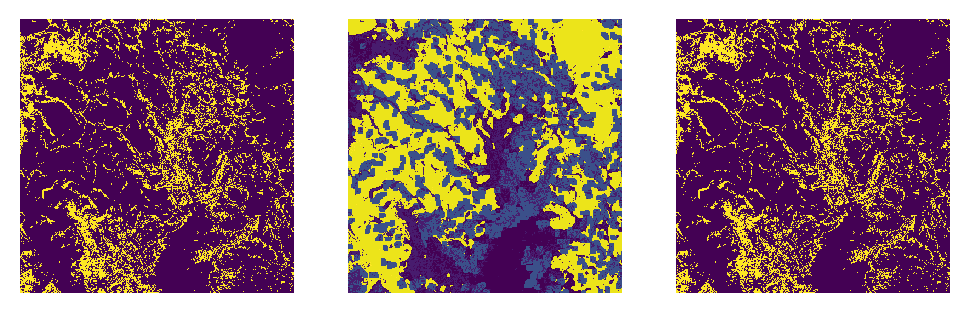

In [84]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, dpi=200)

with gw.open(fn_mask) as ds:
    
    dss = ds.sel(band=1)[3000:3500, 3000:3500]
    
    bits = dss.load().values
    
    mask = raster_tools.QAMasker(bits, 'L8-C1', ['cloud', 'shadow', 'water'])
    
    yesclouds = cloud_confidence(bits) == 3
    
    ax1.imshow(mask.mask)
    ax1.axis('off')
    ax2.imshow(bits)
    ax2.axis('off')
    ax3.imshow(yesclouds)
    ax3.axis('off')
    
    plt.show()

In [ ]:
with rasterio.open(qatif) as src:
    yesclouds = cloud_confidence(src.read(1)) == 3

<xarray.DataArray (band: 1, y: 7951, x: 7821)>
dask.array<open_rasterio-fe0e84f8fa844867f2632165727a80c0<this-array>, shape=(1, 7951, 7821), dtype=uint16, chunksize=(1, 256, 256), chunktype=numpy.ndarray>
Coordinates:
  * band     (band) <U3 'red'
  * y        (y) float64 4.268e+06 4.268e+06 4.268e+06 ... 4.03e+06 4.03e+06
  * x        (x) float64 2.043e+05 2.043e+05 2.044e+05 ... 4.389e+05 4.389e+05
Attributes:
    transform:      (30.0, 0.0, 204285.0, 0.0, -30.0, 4268115.0)
    crs:            +init=epsg:32611
    res:            (30.0, 30.0)
    is_tiled:       1
    nodatavals:     (nan,)
    scales:         (1.0,)
    offsets:        (0.0,)
    AREA_OR_POINT:  Point
<xarray.DataArray (y: 500, x: 500)>
dask.array<getitem, shape=(500, 500), dtype=uint16, chunksize=(256, 256), chunktype=numpy.ndarray>
Coordinates:
    band     <U3 'red'
  * y        (y) float64 4.178e+06 4.178e+06 4.178e+06 ... 4.163e+06 4.163e+06
  * x        (x) float64 2.943e+05 2.943e+05 2.944e+05 ... 3.092e+05 3

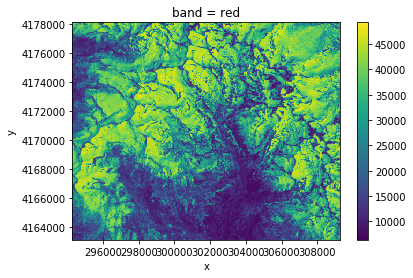

In [33]:
with gw.open(fn, band_names=['red']) as ds:
    print(ds)
    dss = ds.sel(band='red')[3000:3500, 3000:3500]
    print(dss)
    dss.plot.imshow()